# Topic : Predicting Electric vehicle range based on features 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [5]:
df=pd.read_csv("C:\\Users\\ajayc\\Downloads\\Electric_Vehicle_Population_Data.csv")
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235687,1C4RJXN62R,Pierce,Tacoma,WA,98407.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,27.0,267004272,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
235688,5YJSA1E28J,Snohomish,Stanwood,WA,98292.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.0,0.0,10.0,198794410,POINT (-122.37265 48.24159),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.306105e+10
235689,3FA6P0SU2F,King,Redmond,WA,98052.0,2015,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,48.0,261742288,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
235690,WA1BCBFZ6P,Snohomish,Lake Stevens,WA,98258.0,2023,AUDI,Q4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,253474854,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10


In [7]:
print("Dataset info:")
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 no

In [9]:
print("Shape of the dataset:")
df.shape

Shape of the dataset:


(235692, 17)

In [11]:
print("Columns of the dataset:")
print(df.columns)

Columns of the dataset:
Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [13]:
print("statistical summary:")
print(df.describe())

statistical summary:
         Postal Code     Model Year  Electric Range      Base MSRP  \
count  235689.000000  235692.000000   235656.000000  235656.000000   
mean    98177.656463    2021.406658       46.262569     787.268328   
std      2524.218661       2.991908       84.045829    7177.668305   
min      1731.000000    2000.000000        0.000000       0.000000   
25%     98052.000000    2020.000000        0.000000       0.000000   
50%     98126.000000    2023.000000        0.000000       0.000000   
75%     98374.000000    2024.000000       38.000000       0.000000   
max     99577.000000    2025.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         235198.000000    2.356920e+05       2.356890e+05  
mean              28.879519    2.353127e+08       5.298066e+10  
std               14.904644    6.799098e+07       1.521066e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               17.00

In [15]:
print("Null values of the dataset:")
print(df.isnull().sum())

Null values of the dataset:
VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dty

In [17]:
print("null value percentage:")
null_percentage=(df.isnull().sum()/len(df))*100
print(null_percentage)


null value percentage:
VIN (1-10)                                           0.000000
County                                               0.001273
City                                                 0.001273
State                                                0.000000
Postal Code                                          0.001273
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.015274
Base MSRP                                            0.015274
Legislative District                                 0.209596
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.004243
Electric Utility                               

In [19]:
df.duplicated().sum()

0

In [21]:
# Handling Null Values
# numerical columns
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mean())
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].mean())
df['Base MSRP'] = df['Base MSRP'].fillna(df['Base MSRP'].mean())
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].mean())
df['DOL Vehicle ID'] = df['DOL Vehicle ID'].fillna(df['DOL Vehicle ID'].mean())
df['2020 Census Tract'] = df['2020 Census Tract'].fillna(df['2020 Census Tract'].mean())
#you can use median also depedning on the data distribution

In [23]:
# categorical columns
df['County'] = df['County'].fillna(df['County'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Vehicle Location'] = df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0])
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])

In [25]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [27]:
print("Null values of the dataset:")
print(df.isnull().sum())

Null values of the dataset:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [29]:
# Differentiating Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print Results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']
Numerical Columns: ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']


# check skewness of the dataset 

In [31]:
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

# Compute skewness
skewness_values = df[columns].skew()
print("skewness of the columns:\n",skewness_values)

skewness of the columns:
 Postal Code            -29.436487
Model Year              -1.269370
Electric Range           1.848788
Base MSRP               15.790603
Legislative District    -0.430313
DOL Vehicle ID           0.055456
2020 Census Tract      -27.733378
dtype: float64


The dataset is asymmetrical.so we choose IQR method for outlier detection 

In [33]:
# Columns to check for outliers
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

# Function to detect outliers using IQR
def detect_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    return outliers

# Detect outliers
outliers_iqr = detect_outliers_iqr(df, columns)

# Display outliers
for col, outlier_values in outliers_iqr.items():
    print(f"Outliers in {col}:\n{outlier_values}\n")

Outliers in Postal Code:
19        98908.0
31        98908.0
34        98942.0
44        98902.0
51        98908.0
           ...   
235675    99019.0
235676    99206.0
235677    99208.0
235682    99352.0
235683    99362.0
Name: Postal Code, Length: 15349, dtype: float64

Outliers in Model Year:
5         2012
26        2013
28        2013
118       2012
132       2013
          ... 
235445    2013
235486    2012
235498    2013
235518    2013
235678    2013
Name: Model Year, Length: 6455, dtype: int64

Outliers in Electric Range:
0         220.0
1         291.0
5         265.0
8         215.0
9         215.0
          ...  
235656    220.0
235658    259.0
235660    291.0
235681    249.0
235688    249.0
Name: Electric Range, Length: 38754, dtype: float64

Outliers in Base MSRP:
5         59900.0
46        69900.0
56        31950.0
101       44100.0
139       32250.0
           ...   
235566    31950.0
235573    69900.0
235614    52900.0
235621    31950.0
235636    31950.0
Name: Base MSR

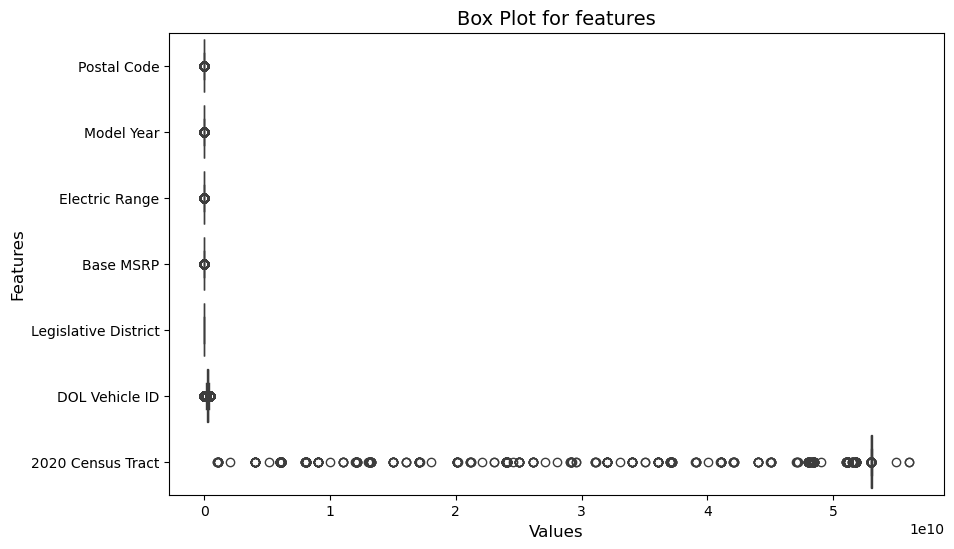

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

# Plotting the Box Plot for Electric Range"
plt.figure(figsize=(10, 6))

# Box plot for Electric Range" (excluding NaN values)
sns.boxplot(df[columns], orient='h')

# Adding title and labels
plt.title('Box Plot for features', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.show()

In [59]:
# Function to remove outliers using IQR

columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers
df_cleaned = remove_outliers_iqr(df, columns)

# Save or display cleaned data
print("Outliers removed using IQR method.")
print("before removing the data:", len(df))
print("after removing the data:", len(df_cleaned))
print("outliers:", len(df)-len(df_cleaned))

Outliers removed using IQR method.
before removing the data: 235692
after removing the data: 167997
outliers: 67695


In [61]:
df.shape

(235692, 17)

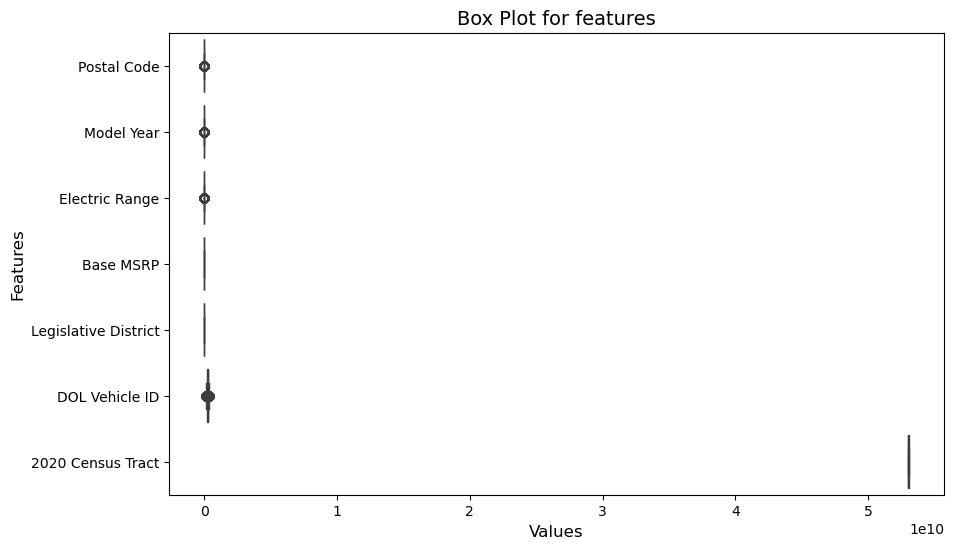

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

# Plotting the Box Plot for Electric Range"
plt.figure(figsize=(10, 6))

# Box plot for Electric Range" (excluding NaN values)
sns.boxplot(df_cleaned[columns], orient='h')

# Adding title and labels
plt.title('Box Plot for features', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.show()